In [ ]:
#The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and 
#their self-reported mental health. 
#Ideally, these findings could contribute to a more informed application of MT or 
#simply provide interesting sights about the mind.

#1. What music features are most correlated to mental health?

#2. Also, if we know certain types of music are related with good/bad mental health, we can apply that in the future mental health field,
#such as providing certain music therapy, to better provide help to people with mental health problems.

In [3]:
import pandas as pd
df = pd.read_csv('/Users/apple/Desktop/1030_sem_project/mxmh_survey_results.csv')
df = df.drop('Permissions', axis = 1)
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


**Filter Rows**

In [4]:
#how many people said 'Music improve their mental health?'
MentalHealthImprove = df[df['Music effects']== 'Improve'].shape[0]
print(MentalHealthImprove, 'people said music improve their mental health')

542 people said music improve their mental health


In [5]:
#how many people said 'Music worsen their menal health?'
MentalHealthWorsen = df[df['Music effects']== 'Worsen'].shape[0]
print(MentalHealthWorsen, 'people said music worsen their mental health')

17 people said music worsen their mental health


In [6]:
#how many people have a relatively bad mental health? >5 on 'Anxiety', 'Depression', 'Insomnia', 'OCD'
AnxietyBad = df[df['Anxiety'] > 5].shape[0]
print(AnxietyBad, 'people constantly experience Anxiety')

444 people constantly experience Anxiety


In [7]:
DepressionBad = df[df['Depression'] > 5].shape[0]
print(DepressionBad, 'people constantly experience Depression')

344 people constantly experience Depression


In [8]:
InsomniaBad = df[df['Insomnia'] > 5].shape[0]
print(InsomniaBad, 'people constantly experience Insomnia')

231 people constantly experience Insomnia


In [9]:
OCDBad = df[df['OCD'] > 5].shape[0]
print(OCDBad, 'people constantly experience OCD')

131 people constantly experience OCD


**EDA**

In [10]:
df.shape

(736, 32)

In [11]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [12]:
#Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature. 
#I would set 'Anxiety' as the target variable, since from filtering the data, we can see 'Anxiety' has the most people below average 
#mental health
print(df['Anxiety'].describe())
print('This column is categorical and ordinal')

count    736.000000
mean       5.837636
std        2.793054
min        0.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Anxiety, dtype: float64
This column is categorical and ordinal


In [13]:
sorted(df.value_counts(df['Anxiety']))

[1, 29, 35, 44, 56, 56, 59, 67, 69, 83, 115, 122]

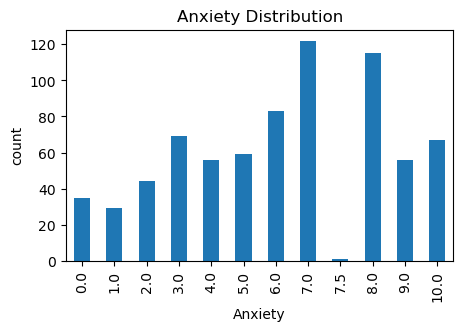

In [14]:
#Visualize the target variable. Don't forget the axis labels and graph title. 
#Make sure to use appropriate arguments to best display the data.
import matplotlib
import numpy as np
from matplotlib import pylab as plt

plt.figure(figsize=(5,3))
value_counts = pd.value_counts(df['Anxiety'])
value_counts.sort_index().plot.bar()
plt.ylabel('count')
plt.xlabel('Anxiety')
plt.title('Anxiety Distribution')
plt.show()

We can see from the above that most people has a level of 7, which is not good

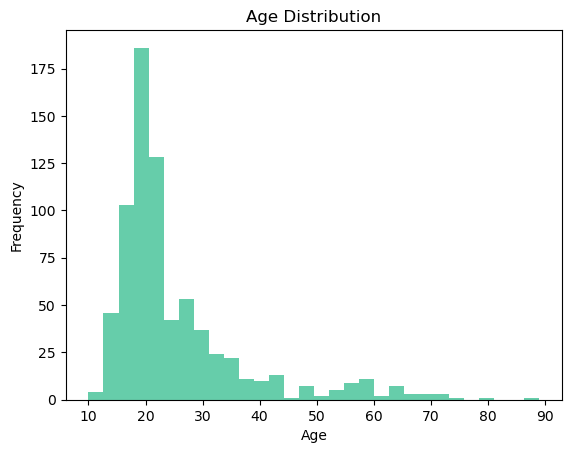

In [15]:
import numpy as np
plt.hist(df['Age'], bins=30, color='mediumaquamarine')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

We can see from the above plot that this dataset is mainly about people around 20s.\
So the results or conclusions we get might only be useful when applying to people in 20s.\
Another problem is that this may introduce age bias, i.e. influencing which music genres are most popular.

In [16]:
pd.value_counts(df['Fav genre'])

Fav genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


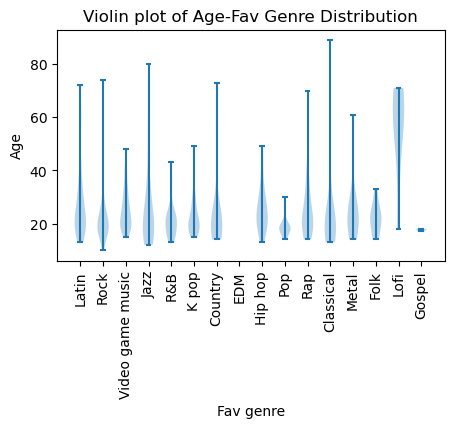

In [17]:
#To see the genre and age relations from above conclusion
#More Visualization plots here
dataset = [df[df['Fav genre'] == 'Rock']['Age'].values,
          df[df['Fav genre'] == 'Pop']['Age'].values,
          df[df['Fav genre'] == 'Metal']['Age'].values,
          df[df['Fav genre'] == 'Classical']['Age'].values,
          df[df['Fav genre'] == 'Video game music']['Age'].values,
          df[df['Fav genre'] == 'EDM']['Age'].values,
          df[df['Fav genre'] == 'R&B']['Age'].values,
          df[df['Fav genre'] == 'Hip hop']['Age'].values,
          df[df['Fav genre'] == 'Folk']['Age'].values,
          df[df['Fav genre'] == 'K pop']['Age'].values,
          df[df['Fav genre'] == 'Country']['Age'].values,
          df[df['Fav genre'] == 'Rap']['Age'].values,
          df[df['Fav genre'] == 'Jazz']['Age'].values,
          df[df['Fav genre'] == 'Lofi']['Age'].values,
          df[df['Fav genre'] == 'Gospel']['Age'].values,
          df[df['Fav genre'] == 'Latin']['Age'].values]

plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16], df['Fav genre'].unique(),rotation = 90)
plt.xlabel('Fav genre')
plt.ylabel('Age')
plt.title('Violin plot of Age-Fav Genre Distribution')
plt.show()

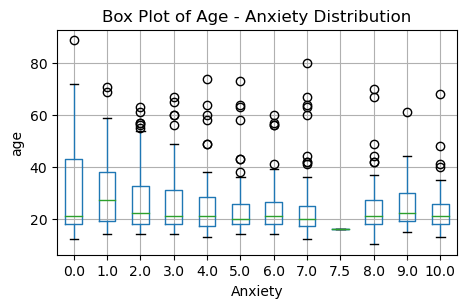

In [18]:
#To see the relations between Age and Anxiety level
#More Visualization plots here
df[['Age','Anxiety']].boxplot(by='Anxiety',figsize=(5,3))
plt.ylabel('age')
plt.xlabel('Anxiety')
plt.suptitle('')
plt.title('Box Plot of Age - Anxiety Distribution')
plt.show()

In [19]:
#To see the relations between genre and Anxiety level - corresponding to my goal
#More Visualization plots here
count_matrix = df.groupby(['Anxiety', 'Fav genre']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Fav genre  Classical  Country  EDM  Folk  Gospel  Hip hop  Jazz  K pop  Latin  \
Anxiety                                                                         
0.0              6.0      2.0  5.0   2.0     NaN      NaN   1.0    1.0    1.0   
1.0              3.0      2.0  2.0   NaN     1.0      NaN   NaN    NaN    NaN   
2.0              4.0      2.0  2.0   NaN     NaN      3.0   2.0    1.0    NaN   
3.0              5.0      1.0  1.0   2.0     2.0      5.0   3.0    1.0    1.0   
4.0              5.0      2.0  4.0   3.0     NaN      1.0   NaN    5.0    NaN   
5.0              3.0      2.0  3.0   NaN     NaN      3.0   1.0    2.0    NaN   
6.0              5.0      1.0  4.0   5.0     2.0      4.0   3.0    2.0    NaN   
7.0             11.0      5.0  3.0   3.0     NaN      8.0   3.0    5.0    NaN   
7.5              NaN      NaN  NaN   NaN     NaN      NaN   NaN    NaN    NaN   
8.0              8.0      5.0  4.0   9.0     NaN      6.0   3.0    5.0    NaN   
9.0              3.0      3.

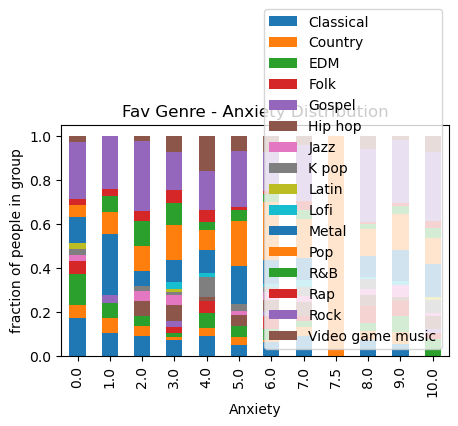

In [20]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('fraction of people in group')
plt.title('Fav Genre - Anxiety Distribution')
plt.legend(loc=4)
plt.show()

**Splitting and preprocessing**

In [21]:
#Choose a way to split the data (basic/Kfold/stratified)
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold

y = df['Anxiety'] 
X = df.loc[:, df.columns != 'Anxiety']

random_state =42
# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('   training set:',X_train.shape, y_train.shape) 
    print('   validation set:',X_val.shape, y_val.shape) 

(588, 31) (588,)
test set: (148, 31) (148,)
   training set: (470, 31) (470,)
   validation set: (118, 31) (118,)
   training set: (470, 31) (470,)
   validation set: (118, 31) (118,)
   training set: (470, 31) (470,)
   validation set: (118, 31) (118,)
   training set: (471, 31) (471,)
   validation set: (117, 31) (117,)
   training set: (471, 31) (471,)
   validation set: (117, 31) (117,)


In [32]:
pd.value_counts(df['Insomnia'])

Insomnia
0.0     149
2.0      88
1.0      82
3.0      68
6.0      62
7.0      59
4.0      59
5.0      58
8.0      49
10.0     34
9.0      27
3.5       1
Name: count, dtype: int64

**Missing Values**

In [69]:
#Do we have missing values? 
#If you have missing values, describe the basic properties of the missing values
#e.g., what fraction of the points have missing values, which features, what fraction of the features are missing, etc
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (736, 32)
fraction of missing values in features:
Age                          0.001359
Primary streaming service    0.001359
While working                0.004076
Instrumentalist              0.005435
Composer                     0.001359
Foreign languages            0.005435
BPM                          0.145380
Music effects                0.010870
dtype: float64
data types of the features with missing values:
Age                          float64
Primary streaming service     object
While working                 object
Instrumentalist               object
Composer                      object
Foreign languages             object
BPM                          float64
Music effects                 object
dtype: object
fraction of points with missing values: 0.16304347826086957


In [70]:
#Can we use dropping columns/rows/imputations to deal with missing values in this dataset?
#Drop rows with missing value
df_r = df.dropna()
print(df.shape, df_r.shape)

(736, 32) (616, 32)


No, we can't deal with missing values by droping rows with missing values, since it will drop too many rows.

In [71]:
# drop features with missing values
df_c = df.dropna(axis=1)
print(df.shape, df_c.shape)

(736, 32) (736, 24)


No, we can't deal with missing values by droping columns with missing values, since it will drop 8 columns.

**Preprocess Data**
- Deal with missing values for categorical values 
- Standardizatin for continuous values

In [79]:
#Preprocess the data - what preprocessor I use? (encoder/scaler + fit_transform)
from sklearn.preprocessing import OrdinalEncoder #Ordinal variable
#help(OrdinalEncoder)

# initialize the encoder
Ordinal_ftr = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', \
               'Frequency [Hip hop]','Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', \
               'Frequency [Metal]', 'Frequency [Pop]','Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', \
               'Frequency [Video game music]', 'Depression', 'Insomnia','OCD']

Ordinal_cats = [['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                ['Never','Rarely','Sometimes','Very frequently'],['Never','Rarely','Sometimes','Very frequently'],\
                [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10],[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10],[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]]
# ordinal_cats must contain one list per ordinal feature! each list contains the ordered list of categories 
# of the corresponding feature

enc_o = OrdinalEncoder(categories = Ordinal_cats)   # By default, the categories are alphabetically ordered
                                                    # which is NOT what you want usually.

# fit the training data
enc_o.fit(X_train[Ordinal_ftr])  # the encoder expects a 2D array, that's why the column name is in a list

# transform X_train. We could use enc.fit_transform(X_train) to combine fit and transform
ordinal_train = enc_o.transform(X_train[Ordinal_ftr])
print('transformed train features:')
print(Ordinal_ftr)
# transform X_val
ordinal_val = enc_o.transform(X_val[Ordinal_ftr])
print('transformed validation features:')
print(Ordinal_ftr)
# transform X_test
ordinal_test = enc_o.transform(X_test[Ordinal_ftr])
print('transformed test features:')
print(ordinal_test)

transformed train features:
['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Depression', 'Insomnia', 'OCD']
transformed validation features:
['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Depression', 'Insomnia', 'OCD']
transformed test features:
[[ 2.  0.  1. ... 14.  2.  2.]
 [ 1.  1.  1. ... 12. 12.  2.]
 [ 0.  0.  0. ...  6.  2.  6.]
 ...
 [ 1.  0.  3. ...  4.  2. 10.]
 [ 3.  0.  2. ...  0.  8.  

In [80]:
from sklearn.preprocessing import OneHotEncoder #categorical feature
# let's collect all categorical features first
onehot_ftrs = ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', \
                   'Exploratory', 'Foreign languages', 'Music effects']
# initialize the encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# fit the training data
enc.fit(X_train[onehot_ftrs])
print('feature names:',enc.get_feature_names_out(onehot_ftrs))
print(len(enc.get_feature_names_out(onehot_ftrs)))

feature names: ['Primary streaming service_Apple Music'
 'Primary streaming service_I do not use a streaming service.'
 'Primary streaming service_Other streaming service'
 'Primary streaming service_Pandora' 'Primary streaming service_Spotify'
 'Primary streaming service_YouTube Music' 'Primary streaming service_nan'
 'While working_No' 'While working_Yes' 'While working_nan'
 'Instrumentalist_No' 'Instrumentalist_Yes' 'Instrumentalist_nan'
 'Composer_No' 'Composer_Yes' 'Composer_nan' 'Fav genre_Classical'
 'Fav genre_Country' 'Fav genre_EDM' 'Fav genre_Folk' 'Fav genre_Gospel'
 'Fav genre_Hip hop' 'Fav genre_Jazz' 'Fav genre_K pop' 'Fav genre_Latin'
 'Fav genre_Lofi' 'Fav genre_Metal' 'Fav genre_Pop' 'Fav genre_R&B'
 'Fav genre_Rap' 'Fav genre_Rock' 'Fav genre_Video game music'
 'Exploratory_No' 'Exploratory_Yes' 'Foreign languages_No'
 'Foreign languages_Yes' 'Foreign languages_nan' 'Music effects_Improve'
 'Music effects_No effect' 'Music effects_Worsen' 'Music effects_nan']
41


/Users/apple/opt/anaconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
# transform X_train
onehot_train = enc.transform(X_train[onehot_ftrs])
print('transformed train features:')
print(onehot_train)
# transform X_val
onehot_val = enc.transform(X_val[onehot_ftrs])
print('transformed val features:')
print(onehot_val)
# transform X_test
onehot_test = enc.transform(X_test[onehot_ftrs])
print('transformed test features:')
print(onehot_test)

transformed train features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
transformed val features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
transformed test features:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [82]:
#Continuous feature preprocessing
from sklearn.preprocessing import StandardScaler
std_ftrs = ['Age', 'Hours per day', 'BPM']
scaler = StandardScaler()
print(scaler.fit_transform(X_train[std_ftrs]))
print(scaler.transform(X_val[std_ftrs]))
print(scaler.transform(X_test[std_ftrs]))

[[-0.61011942 -0.52123343 -0.04969086]
 [-0.44611821 -0.20351511 -0.04969128]
 [-0.61011942 -0.68009258 -0.04968987]
 ...
 [ 1.27589458 -0.20351511 -0.04969061]
 [-0.85612125  0.74963984 -0.04969067]
 [-0.69212003  0.43192153 -0.04969019]]
[[-0.61011942 -0.52123343 -0.04969015]
 [-0.61011942 -0.20351511 -0.04969156]
 [ 0.70189032 -0.52123343 -0.04969047]
 [ 0.04588545  0.74963984 -0.0496908 ]
 [-0.61011942  0.43192153 -0.04969027]
 [ 0.70189032  0.11420321 -0.04968965]
 [ 0.5378891  -0.52123343         nan]
 [-0.11811577 -0.20351511 -0.04969138]
 [-0.20011638 -0.52123343 -0.04969088]
 [-0.3641176  -0.52123343 -0.04968987]
 [-0.69212003  0.43192153 -0.04968926]
 [-0.28211699 -0.83895174 -0.04969071]
 [-0.20011638 -0.52123343 -0.04969011]
 [ 3.98191467 -0.83895174 -0.04969029]
 [-0.61011942 -0.20351511 -0.04969027]
 [-0.77412064  2.02051311 -0.04968926]
 [ 0.70189032 -0.83895174         nan]
 [-0.3641176  -0.20351511 -0.04968987]
 [ 1.19389397 -0.20351511 -0.04969047]
 [ 0.45588849 -0.83

In [66]:
pd.value_counts(df['Frequency [Classical]'])

Frequency [Classical]
Rarely             259
Sometimes          200
Never              169
Very frequently    108
Name: count, dtype: int64

In [83]:
#check missing value portion for Categorical Features after preprocessing
catfeature_names = enc.get_feature_names_out()
df_cattrain = pd.DataFrame(data=onehot_train,columns=catfeature_names)
print('data dimensions:',df_cattrain.shape)
perc_missing_per_ftr = df_cattrain.isnull().sum(axis=0)/df_cattrain.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_cattrain[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_cattrain.isnull().sum(axis=1)!=0)/df_cattrain.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (471, 41)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


In [84]:
#check missing value portion for Ordinal Features after preprocessing
ordfeature_names = enc_o.get_feature_names_out()
df_ordtrain = pd.DataFrame(data=ordinal_train,columns=ordfeature_names)
print('data dimensions:',df_ordtrain.shape)
perc_missing_per_ftr = df_ordtrain.isnull().sum(axis=0)/df_ordtrain.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_ordtrain[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_ordtrain.isnull().sum(axis=1)!=0)/df_ordtrain.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (471, 19)
fraction of missing values in features:
Series([], dtype: float64)
data types of the features with missing values:
Series([], dtype: object)
fraction of points with missing values: 0.0


- We can see that after preprocessing, the missing values fraction is 0 for both categorical and ordinal features

**Correlation**

In [ ]:
#Calculate how strong the linear correlation is between each feature and the target variable (disease progression). 
#Prepare a bar plot that shows the top 5 most important features.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(10)

y = df['Anxiety'] 
X = df.loc[:, df.columns != 'Anxiety'] 

#linear
f_test, p_values = f_regression(X, y)
print('f score',f_test)
print('p values',p_values)
#non-linear
mi = mutual_info_regression(X, y)
print('mi',mi)
#sorted(f_test) --> larger, more correlated
#sorted(p_values, reverse = True) --> smaller, more correlated
#mi --> larger, more correlated

In [ ]:
#Calculate the non-linear correlations with the target variable.
#Plot the top 5 most important features.

In [ ]:
#Prepare a plot which shows the most important feature vs. the target variable!


In [ ]:
#Using the feature matrix of the diabetes dataset, calculate the Pearson correlation matrix of the features (see method here) 
#and visualize the correlation matrix as a heatmap. 
#Make sure that the feature names are on the x and y axes, add a colorbar to indicate the strength of the correlation. 
#Note that the Pearson correlation coefficient is between -1 and 1 so make sure the color scale is between -1 and 1 on the figure.

#Find out the two features having the strongest correlation. Is there a need to potentially remove any of the features?


In [87]:
pwd

'/Users/apple/Desktop/1030_sem_project'